In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../Processed Data/Dataset #1 After Feature Extraction.csv", dtype={1: str}) #Reading in the CSV file into a Dataframe

In [5]:
df.shape

(450176, 14)

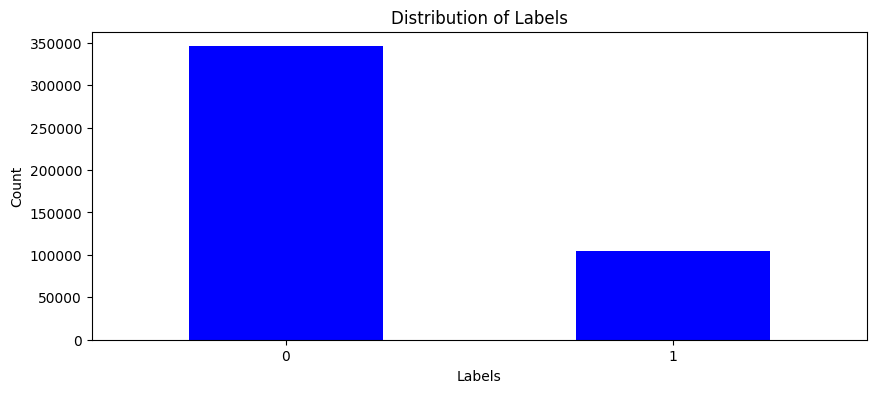

In [6]:
label_counts = df['Label'].value_counts()

plt.figure(figsize=(10, 4))
label_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   URL                      450176 non-null  object
 1   Domain                   450173 non-null  object
 2   IP_Address               450176 non-null  int64 
 3   Prefix/Suffix_in_Domain  450176 non-null  int64 
 4   Tiny_URL                 450176 non-null  int64 
 5   @_Symbol                 450176 non-null  int64 
 6   URL_Length               450176 non-null  int64 
 7   Http/https_in_Domain     450176 non-null  int64 
 8   Depth_Of_URL             450176 non-null  int64 
 9   Redirection              450176 non-null  int64 
 10  Num_of_Dots              450176 non-null  int64 
 11  Num_of_Hyphens           450176 non-null  int64 
 12  Num_of_Underscore        450176 non-null  int64 
 13  Label                    450176 non-null  int64 
dtypes: int64(12), object

In [8]:
df.describe()

,IP_Address,Prefix/Suffix_in_Domain,Tiny_URL,@_Symbol,URL_Length,Http/https_in_Domain,Depth_Of_URL,Redirection,Num_of_Dots,Num_of_Hyphens,Num_of_Underscore,Label
count,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000
mean,0.006366,0.064790,0.002046,0.006564,0.482471,0.000400,2.127486,0.003785,2.620553,1.251930,0.419527,0.231994
std,0.079535,0.246156,0.045185,0.080753,0.499693,0.019992,1.577764,0.061407,1.144966,2.570521,1.337560,0.422105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,3.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,1.000000,32.000000,42.000000,200.000000,1.000000


In [9]:
df1 = df.drop(['Domain'], axis = 1).copy()

In [10]:
df1.isna().sum() #Checking if any NaN values exist in any of the columns of df1

URL                        0
IP_Address                 0
Prefix/Suffix_in_Domain    0
Tiny_URL                   0
@_Symbol                   0
URL_Length                 0
Http/https_in_Domain       0
Depth_Of_URL               0
Redirection                0
Num_of_Dots                0
Num_of_Hyphens             0
Num_of_Underscore          0
Label                      0
dtype: int64

In [11]:
df1.isnull().sum() #Checking if any null values exist in any of the columns of df1

URL                        0
IP_Address                 0
Prefix/Suffix_in_Domain    0
Tiny_URL                   0
@_Symbol                   0
URL_Length                 0
Http/https_in_Domain       0
Depth_Of_URL               0
Redirection                0
Num_of_Dots                0
Num_of_Hyphens             0
Num_of_Underscore          0
Label                      0
dtype: int64

In [17]:
df_shuffled = df1.sample(frac=1).reset_index(drop=True) #Shuffling the entries of df1

In [18]:
df_shuffled.head()

,URL,IP_Address,Prefix/Suffix_in_Domain,Tiny_URL,@_Symbol,URL_Length,Http/https_in_Domain,Depth_Of_URL,Redirection,Num_of_Dots,Num_of_Hyphens,Num_of_Underscore,Label
0,https://www.vo2ov.com/Dan-Bigras-megaupload-li...,0,0,0,0,0,0,1,0,3,3,0,0
1,https://www.segur-le-chateau.blogspot.com/,0,1,0,0,0,0,0,0,3,2,0,0
2,https://www.wpafilmlibrary.com/detail/john_d_r...,0,0,0,0,1,0,3,0,3,4,7,0
3,http://docsign.fabiocarvalhocorretor.com.br/co...,0,0,0,0,1,0,2,0,4,0,0,1
4,http://dropboxx.ga/login.php,0,0,0,0,0,0,1,0,2,0,0,1


In [19]:
y = df_shuffled['Label']
X = df_shuffled.drop(['URL', 'Label'], axis = 1)

In [22]:
# Trainsing set: 70%
# Validating set: 15%
# Testing set: 15%


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    stratify=y,  #Due to the huge imbalance of the two classes(phishing = 1, benign = 0), the ratio of splititng between the classes are maintained
    random_state=10
)


In [23]:
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, 
    test_size=0.5, 
    stratify=y_test, #Due to the huge imbalance of the two classes(phishing = 1, benign = 0), the ratio of splititng between the classes are maintained
    random_state=10
)

In [24]:
smote = SMOTE(random_state=10, sampling_strategy="all")
X_train, y_train = smote.fit_resample(X_train, y_train)

In [25]:
X_train.shape

(484032, 11)

In [26]:
X_val.shape

(67526, 11)

In [27]:
X_test.shape

(67527, 11)

In [28]:
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)



In [32]:
X_train.to_csv("Training Dataset/X_train #1.csv")
X_val.to_csv("Validation Dataset/X_val #1.csv")
X_test.to_csv("Testing Dataset/X_test #1.csv")

y_train.to_csv("Training Dataset/y_train #1.csv")
y_val.to_csv("Validation Dataset/y_val #1.csv")
y_test.to_csv("Testing Dataset/y_test #1.csv")